In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
x1 = torch.tensor(2.0, requires_grad = True)
# x1 = torch.tensor(2)

In [122]:
y1 = 2*x1**4+x1**3+3*x1**2+5*x1+1

In [123]:
print(y1)

tensor(63., grad_fn=<AddBackward0>)


In [124]:
type(y1)

torch.Tensor

In [125]:
y1.backward()

In [126]:
x1

tensor(2., requires_grad=True)

In [127]:
x1.grad  # this is the slope of equation when x = 2

tensor(93.)

In [128]:
x2 = torch.tensor([[1.,2.,3.],[3.,2.,1.]], requires_grad = True)

In [129]:
x2

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)

In [130]:
y2 = 3*x2+2
print(y2)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [131]:
z2 = 2*y2**2

In [132]:
print(z2)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [133]:
out = z2.mean()

In [42]:
out.backward()

In [134]:
print(x2.grad)

None


In [135]:
import torch.nn as nn 

In [136]:
x = torch.linspace(1,50,50).reshape(-1,1)

In [137]:
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [138]:
torch.manual_seed(30)

In [139]:
e = torch.randint(1,9,(5,3),dtype = torch.float)  # randints between 1 and 9 in 5*3 matrix  

In [140]:
print(e)

tensor([[6., 6., 6.],
        [6., 5., 5.],
        [8., 3., 6.],
        [4., 2., 7.],
        [4., 2., 8.]])


In [141]:
y = 2*x+1
print(y.shape)

torch.Size([50, 1])


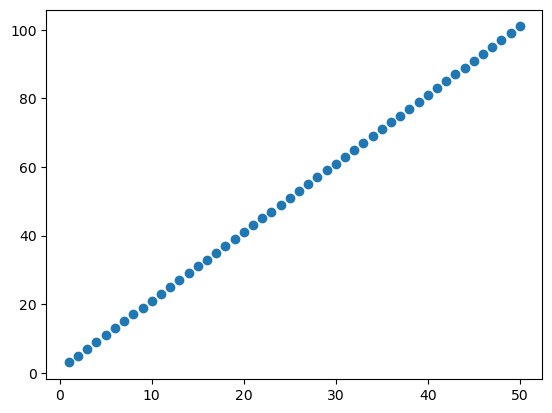

In [142]:
plt.scatter(x,y) #no noise added

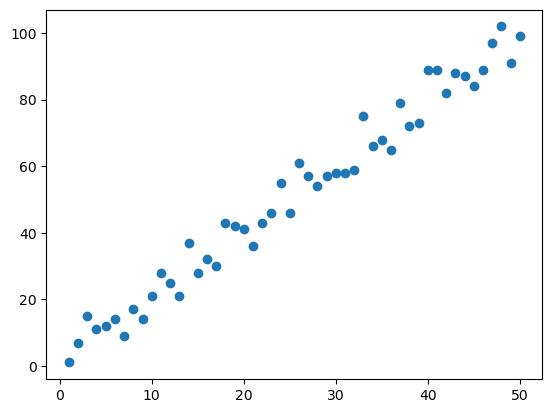

In [143]:
n = torch.randint(-8,9,(50,1),dtype = torch.float)
y = 2*x+1+n
plt.scatter(x,y)

In [144]:
torch.manual_seed(50)
model = nn.Linear(in_features=1, out_features=1)  # its simple linear model with one inut and one output and weight and bias is randomly initialaized 
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.2360]], requires_grad=True)
Parameter containing:
tensor([-0.8626], requires_grad=True)


In [160]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    
    def forward(self, x):
        y_pred = self.linear(x) # dim of in_feature and x will be same
        return y_pred

In [161]:
torch.manual_seed(50)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.2360]], requires_grad=True)
Parameter containing:
tensor([-0.8626], requires_grad=True)


In [162]:
for name, param in model.named_parameters():
    print(name,param.item())

linear.weight 0.23604393005371094
linear.bias -0.8626136779785156


In [163]:
x3 = torch.tensor([2.0])
model.forward(x3)

tensor([-0.3905], grad_fn=<ViewBackward0>)

In [164]:
x4 = np.linspace(1,50,50)

In [165]:
x4

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [166]:
w4 = 0.23604393005371094
b4 = -0.8626136779785156
y4 = w4*x4+b4

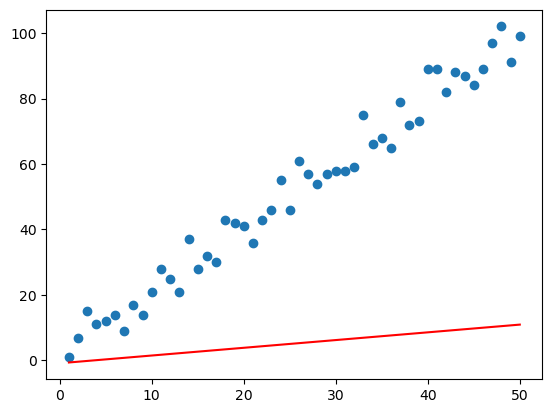

In [167]:
plt.scatter(x,y)
plt.plot(x4,y4,'r')

In [168]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

In [169]:
epochs = 50
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    print(f"epoch {i} loss {loss.item()} weight {model.linear.weight.item()} bias {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 loss 2776.731201171875 weight 0.23604393005371094 bias -0.8626136779785156
epoch 1 loss 1444.6246337890625 weight 3.311149835586548 bias -0.7700067162513733
epoch 2 loss 756.9051513671875 weight 1.1015756130218506 bias -0.8344153165817261
epoch 3 loss 401.8591003417969 weight 2.6891255378723145 bias -0.7860068678855896
epoch 4 loss 218.56076049804688 weight 1.548383116722107 bias -0.8186602592468262
epoch 5 loss 123.92955780029297 weight 2.3679609298706055 bias -0.7930704951286316
epoch 6 loss 75.07418823242188 weight 1.7790184020996094 bias -0.8093303442001343
epoch 7 loss 49.851112365722656 weight 2.202119827270508 bias -0.79552161693573
epoch 8 loss 36.82856750488281 weight 1.8980517387390137 bias -0.8033186793327332
epoch 9 loss 30.104782104492188 weight 2.1164662837982178 bias -0.7955926656723022
epoch 10 loss 26.632762908935547 weight 1.959468960762024 bias -0.7990212440490723
epoch 11 loss 24.839563369750977 weight 2.0722107887268066 bias -0.7944360971450806
epoch 12 los

Text(0.5, 0, 'EPOCHS')

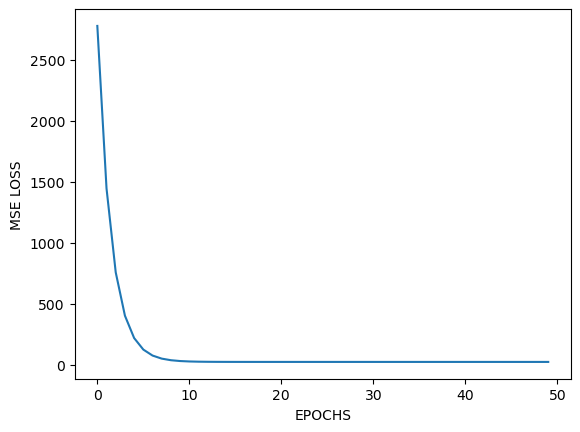

In [170]:
plt.plot(range(epochs),losses)
plt.ylabel("MSE LOSS")
plt.xlabel("EPOCHS")

In [171]:
x5 = np.linspace(0.0,50.0,50)
weight = model.linear.weight.item()
bias = model.linear.bias.item()
predicted_y = weight*x5+bias

In [174]:
print(x5)
print(predicted_y)

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
[ -0.74816233   1.31677782   3.38171797   5.44665812   7.51159827
   9.57653843  11.64147858  13.70641873  15.77135888  17.83629903
  19.90123918  21.96617933  24.03111948  26.09605963  28.16099978
  30.22593993  32.29088009  34.35582024  36.42076039  38.48570054
  40.55064069  42.61558084  44.68052099  46.74546114  48.81040129
  50.87534144  52.94028159  55.00522175  57.0701619   59.1351

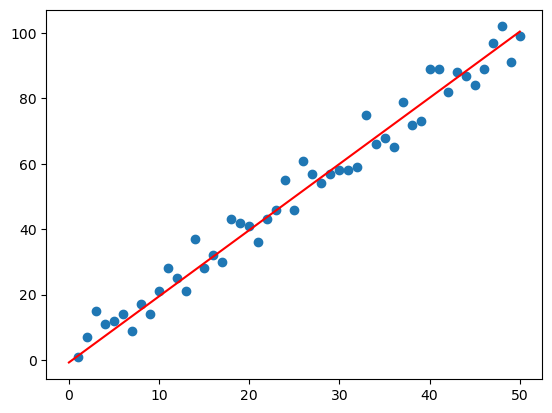

In [176]:
plt.scatter(x,y)
plt.plot(x5,predicted_y,'r')

In [177]:
###################################################################################

In [136]:
import pandas as pd
df = pd.read_csv("C:/Users/Hp/Downloads/Iris.csv")

In [137]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [139]:
df.loc[df['Species'] == 'Iris-setosa', 'Species'] = 0
df.loc[df['Species'] == 'Iris-versicolor', 'Species'] = 1
df.loc[df['Species'] == 'Iris-virginica', 'Species'] = 2

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
features = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values  ## .vaues converts dataframe into array
label = df[['Species']].values

In [142]:
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size = 0.2, random_state = 33)

In [143]:
X_train

array([[5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.4, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6. , 3

In [144]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([120, 4])
torch.Size([120, 1])
torch.Size([30, 4])
torch.Size([30, 1])


In [90]:
print(X_train)
print("******************************************************")
print(X_test)

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1

In [91]:
y_train

array([[1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [0],
    

In [148]:
y_train = np.array(y_train,dtype = np.int64)
y_train = torch.LongTensor(y_train).reshape(-1,1)

y_test = np.array(y_test,dtype = np.int64)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [93]:
from torch.utils.data import TensorDataset, DataLoader

In [94]:
data = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
labels = df[['Species']].values
labels = np.array(labels,dtype = np.int64)
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [95]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [96]:
iris_loader = DataLoader(iris, batch_size = 50, shuffle = True)
for i, sample in enumerate(iris_loader):
    print(i, sample)

0 [tensor([[7.2000, 3.6000, 6.1000, 2.5000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [6.4000, 2.9000, 4.3000

In [97]:
##############################################################################################################################

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [122]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y_pred = self.out(x)
        return y_pred

In [123]:
torch.manual_seed(10)
model = Model()

In [124]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [125]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [126]:
X_train

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1

In [127]:
y_predcheck = model.forward(X_train)

In [128]:
y_predcheck

tensor([[-1.0692e-01, -3.8847e-01, -7.3044e-02],
        [-1.4922e-01, -4.0674e-01, -4.6341e-02],
        [-1.9050e-01, -4.3878e-01, -6.2673e-02],
        [-2.2689e-01, -4.4630e-01, -3.7907e-02],
        [-2.3904e-01, -4.5562e-01, -2.5176e-02],
        [-2.0211e-01, -4.2797e-01, -2.8689e-02],
        [-1.8406e-01, -4.3414e-01, -5.1319e-02],
        [-1.0652e-01, -3.8542e-01, -7.7161e-02],
        [-6.1251e-02, -3.7324e-01, -9.5839e-02],
        [ 2.0175e-02, -3.4056e-01, -1.7373e-01],
        [-1.2095e-01, -4.0721e-01, -4.8452e-02],
        [-1.0097e-01, -3.9003e-01, -7.1262e-02],
        [-1.2128e-01, -3.9610e-01, -6.2064e-02],
        [ 2.2382e-02, -3.3556e-01, -1.8302e-01],
        [ 1.5275e-02, -3.3325e-01, -1.8479e-01],
        [-6.4245e-02, -3.7038e-01, -9.9533e-02],
        [ 1.2234e-02, -3.3705e-01, -1.7732e-01],
        [-2.4022e-01, -4.4256e-01,  2.6703e-04],
        [ 7.9710e-03, -3.4044e-01, -1.7018e-01],
        [-5.4272e-03, -3.3818e-01, -1.6991e-01],
        [-9.7690e-02

In [129]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [134]:
epochs = 500
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    # print(y_pred,y_train)
    loss = criterion(y_pred,y_train)
    if i%10 == 0:
        print(f"epoch is {i} and loss is {loss}")
    losses.append(loss.item())
    # print(f"epoch {i} loss {loss.item()} weight {model.fc1.weight.item()} bias {model.fc1.bias.item()}")
    optimizer.zero_grad() ##why tis check?????
    loss.backward()
    optimizer.step()


epoch is 0 and loss is 0.07618948072195053
epoch is 10 and loss is 0.06908976286649704
epoch is 20 and loss is 0.06450944393873215
epoch is 30 and loss is 0.0612717941403389
epoch is 40 and loss is 0.05880045145750046
epoch is 50 and loss is 0.05681256949901581
epoch is 60 and loss is 0.05515286698937416
epoch is 70 and loss is 0.05372687801718712
epoch is 80 and loss is 0.052479617297649384
epoch is 90 and loss is 0.051375966519117355
epoch is 100 and loss is 0.0503958985209465
epoch is 110 and loss is 0.04992865025997162
epoch is 120 and loss is 0.048943180590867996
epoch is 130 and loss is 0.048169538378715515
epoch is 140 and loss is 0.04752930626273155
epoch is 150 and loss is 0.04695245251059532
epoch is 160 and loss is 0.04643529653549194
epoch is 170 and loss is 0.04595601186156273
epoch is 180 and loss is 0.04551619663834572
epoch is 190 and loss is 0.04511025920510292
epoch is 200 and loss is 0.04473705217242241
epoch is 210 and loss is 0.044395558536052704
epoch is 220 and l

Text(0.5, 0, 'EPOCHS')

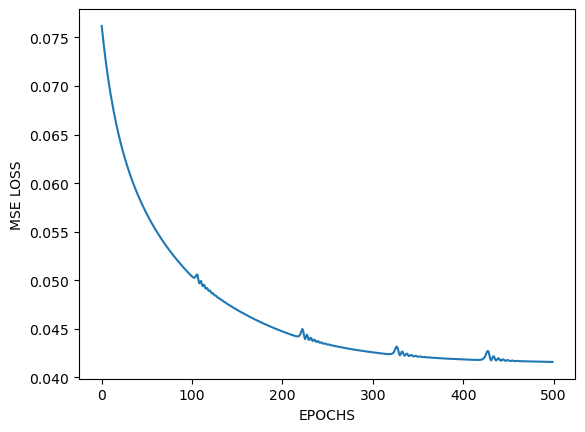

In [135]:
plt.plot(range(epochs),losses)
plt.ylabel("MSE LOSS")
plt.xlabel("EPOCHS")

In [150]:
# X_train = torch.FloatTensor(X_train)
# y_test = torch.FloatTensor(y_test)
y_test = y_test.squeeze()

with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [151]:
loss

tensor(0.0465)

In [155]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1} .) {str(y_val)} {y_test[i]}")
        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f"total corect are ==> {correct}")            

1 .) tensor([-4.9327,  8.1199, -2.6220]) 1
2 .) tensor([-5.0773,  8.4475, -2.6537]) 1
3 .) tensor([ 4.7530, -2.5191, -5.5552]) 0
4 .) tensor([-8.2964,  8.1166,  2.0452]) 1
5 .) tensor([-14.9628,   7.9306,  11.1993]) 2
6 .) tensor([-22.6392,   6.3916,  22.2065]) 2
7 .) tensor([ 4.7363, -2.4935, -5.5590]) 0
8 .) tensor([ 4.7530, -2.5191, -5.5552]) 0
9 .) tensor([-16.1038,   8.0101,  12.5869]) 2
10 .) tensor([-19.7434,   7.2921,  17.9160]) 2
11 .) tensor([-20.7055,   7.0581,  19.3032]) 2
12 .) tensor([ 4.7530, -2.5191, -5.5552]) 0
13 .) tensor([-20.1938,   7.1056,  18.5398]) 2
14 .) tensor([-8.3987,  8.1456,  2.0803]) 1
15 .) tensor([-17.1946,   7.6964,  14.3886]) 2
16 .) tensor([-4.6409,  8.2940, -3.1032]) 1
17 .) tensor([-12.5280,   7.8363,   7.8968]) 2
18 .) tensor([ 4.7530, -2.5191, -5.5552]) 0
19 .) tensor([-8.8061,  8.2985,  2.4212]) 1
20 .) tensor([-17.6744,   8.2426,  14.5347]) 2
21 .) tensor([ 4.7530, -2.5191, -5.5552]) 0
22 .) tensor([ 4.7530, -2.5191, -5.5552]) 0
23 .) tensor([

In [156]:
torch.save(model.state_dict(),'iris_model.pt')

In [157]:
# check how to load pytorch model 

In [158]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [159]:
########################### regression model ###########################

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Hp/Downloads/taxifare.csv")

In [3]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1


In [4]:
def haversine_distance(df, lat1,long1,lat2,long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = r*c
    return d

In [5]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['EDTDate'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)
df['Hour'] = df['EDTDate'].dt.hour
df['AMorPM'] = np.where(df.Hour<12,'am','pm')
df['Weekday'] = df['EDTDate'].dt.strftime("%a")

In [6]:
cat_cols = ['Hour','AMorPM','Weekday']
cont_cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','passenger_count','dist_km']

y_col = ['fare_amount']

In [9]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [10]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTDate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [11]:
print(df['AMorPM'].cat.codes)
print("*"*10)
print(df['AMorPM'].cat.categories)
print("*"*10)
print(df['AMorPM'].cat.codes.values)

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8
**********
Index(['am', 'pm'], dtype='object')
**********
[0 0 0 ... 1 0 1]


In [12]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [13]:
cats = np.stack([hr,ampm,wkdy],axis = 1)

In [14]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [18]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols],1)

conts = np.stack([df[col].values for col in cont_cols],1)

In [19]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [20]:
cats = torch.tensor(cats,dtype = torch.int64)

conts = torch.tensor(conts,dtype = torch.float)

In [21]:
print(cats.size())
print(conts.shape)

torch.Size([120000, 3])
torch.Size([120000, 6])


In [25]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [26]:
print(cat_szs)

print(emb_szs)

[24, 2, 7]
[(24, 12), (2, 1), (7, 4)]


In [37]:
print(cats[:4])

catz = cats[:4]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])


In [32]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])

In [33]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [39]:
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [40]:
embeddingz

[tensor([[-0.0893,  0.2358,  1.3697, -0.0095, -0.1362, -1.4636, -0.3846,  2.1975,
          -2.2309,  0.9403, -0.7750, -0.5461],
         [-1.6670,  0.3943,  0.8360, -0.1994, -0.0972, -0.8440, -1.8926,  0.9103,
           0.0056, -0.4701,  0.2829,  0.9073],
         [-1.1109, -0.1870, -1.1927,  0.6133, -0.5322, -0.6508,  0.2903, -0.9307,
          -0.0282,  0.1222,  0.5059, -1.4930],
         [ 0.4956, -0.4798,  0.3677,  0.5844,  0.1671, -0.1419, -0.5901,  1.9495,
          -1.8620,  0.4721,  0.2380,  0.3683]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.7361],
         [-1.7361],
         [-1.7361],
         [-0.7798]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.9889, -0.2649, -1.3416, -0.8674],
         [-0.0389, -0.6090, -1.3025, -0.8278],
         [-0.0389, -0.6090, -1.3025, -0.8278],
         [-1.0854,  0.5573, -0.4453,  0.2425]], grad_fn=<EmbeddingBackward0>)]

In [41]:
z = torch.cat(embeddingz,1)

In [42]:
z

tensor([[-0.0893,  0.2358,  1.3697, -0.0095, -0.1362, -1.4636, -0.3846,  2.1975,
         -2.2309,  0.9403, -0.7750, -0.5461, -1.7361,  0.9889, -0.2649, -1.3416,
         -0.8674],
        [-1.6670,  0.3943,  0.8360, -0.1994, -0.0972, -0.8440, -1.8926,  0.9103,
          0.0056, -0.4701,  0.2829,  0.9073, -1.7361, -0.0389, -0.6090, -1.3025,
         -0.8278],
        [-1.1109, -0.1870, -1.1927,  0.6133, -0.5322, -0.6508,  0.2903, -0.9307,
         -0.0282,  0.1222,  0.5059, -1.4930, -1.7361, -0.0389, -0.6090, -1.3025,
         -0.8278],
        [ 0.4956, -0.4798,  0.3677,  0.5844,  0.1671, -0.1419, -0.5901,  1.9495,
         -1.8620,  0.4721,  0.2380,  0.3683, -0.7798, -1.0854,  0.5573, -0.4453,
          0.2425]], grad_fn=<CatBackward0>)

In [45]:
selfembddrop = nn.Dropout(0.4)

In [46]:
z = selfembddrop(z)

In [47]:
z

tensor([[-0.0000,  0.3931,  2.2828, -0.0158, -0.2270, -0.0000, -0.0000,  3.6625,
         -3.7182,  1.5672, -1.2917, -0.9101, -2.8935,  0.0000, -0.0000, -0.0000,
         -0.0000],
        [-0.0000,  0.6572,  1.3933, -0.3323, -0.1619, -0.0000, -0.0000,  1.5172,
          0.0093, -0.7835,  0.4715,  0.0000, -0.0000, -0.0648, -1.0151, -2.1709,
         -1.3797],
        [-1.8515, -0.3116, -1.9879,  0.0000, -0.8870, -1.0846,  0.0000, -1.5511,
         -0.0470,  0.2037,  0.8431, -2.4883, -0.0000, -0.0648, -1.0151, -0.0000,
         -1.3797],
        [ 0.8260, -0.7996,  0.0000,  0.9740,  0.2785, -0.0000, -0.0000,  0.0000,
         -0.0000,  0.7869,  0.0000,  0.0000, -1.2996, -1.8089,  0.9288, -0.0000,
          0.4042]], grad_fn=<MulBackward0>)

In [51]:
class Tabularmodel(nn.Module):
    def __self__(self,emb_szs,n_count,out_sz,layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_count = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_embs = sum([nf for ni, nf in emb_szs])
        n_in = n_emb+n_cont

        for i in layers:
           layerlist.append(nn.Linear(n_in,i))
           layerlist.append(nn.Relu(inplace = True))
           layerlist.append(nn.BaatchNorm1d(i))
           layerlist.append(nn.Dropout(p))
           n_in = i

        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self,x_cat,x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)

        return x

In [58]:
torch.manual_seed(101)

model = Tabularmodel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

TypeError: Tabularmodel.__init__() got an unexpected keyword argument 'p'

In [60]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

NameError: name 'model' is not defined

In [64]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [65]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size,batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size,batch_size]

IndexError: index 60000 is out of bounds for dimension 1 with size 3

In [ ]:
y_train = y[:batch_size-test_size]
y_est = y[batch_size-test_size,batch_size]

In [ ]:
import time
start_time = time.time()

epoch = 300
losses = []

for i in range(epoch):
    i+=1
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss)
    if loss%10 == 0:
        print(f"epoch {i}, {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
plt.plot(range(epoch),losses)

In [ ]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val,y_test)
    

In [ ]:
loss

In [ ]:
for i in range(10):
    print(f" {i} .) predicted : {y_val[i].item()}")